🧹 01 — Data Wrangling

In [1]:
import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv("/content/seismic_data.csv")

print("✅ Dataset cargado correctamente")
print("Dimensiones iniciales:", df.shape)

# 1️⃣ Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

✅ Dataset cargado correctamente
Dimensiones iniciales: (4018, 5)


In [2]:
# 2️⃣ Revisar duplicados
duplicados = df.duplicated().sum()
print(f"\nDuplicados: {duplicados}")
if duplicados > 0:
    df = df.drop_duplicates()


Duplicados: 3


In [3]:
# 3️⃣ Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
date(utc)    0
latitude     0
longitude    0
depth        0
magnitude    0
dtype: int64


In [4]:
# 4️⃣ Convertir tipos de datos
# Ejemplo común: fecha y coordenadas
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convertir magnitud y profundidad a numéricos
for col in ['magnitude', 'depth']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# 5️⃣ Eliminar filas sin coordenadas o magnitud
cols_relevantes = ['latitude', 'longitude', 'magnitude', 'depth']
df = df.dropna(subset=[c for c in cols_relevantes if c in df.columns])

In [5]:
# 6️⃣ Crear variables derivadas
if 'magnitude' in df.columns:
    df['mag_category'] = pd.cut(
        df['magnitude'],
        bins=[0, 3.9, 5.9, 7.9, 10],
        labels=['Leve', 'Moderado', 'Fuerte', 'Catastrófico']
    )

In [6]:
# 7️⃣ Resumen post-limpieza
print("\nDimensiones después de limpieza:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)


Dimensiones después de limpieza: (4015, 6)

Tipos de datos:
date(utc)         object
latitude         float64
longitude        float64
depth              int64
magnitude        float64
mag_category    category
dtype: object


In [7]:
# 8️⃣ Vista general
display(df.head(10))

date(utc)  latitude  longitude  depth  magnitude mag_category
0  2025-05-26 03:50:27    -19.63     -69.49     97        5.6     Moderado
1  2025-05-13 00:47:58    -51.25     -72.28     28        5.1     Moderado
2  2025-05-05 09:46:48    -29.49     -71.84     48        5.0     Moderado
3  2025-05-05 02:17:48    -31.89     -70.88     88        5.1     Moderado
4  2025-05-02 15:23:49    -27.52     -72.48     30        5.8     Moderado
5  2025-05-02 12:58:32    -56.88     -68.06     10        7.5       Fuerte
6  2025-04-24 03:20:08    -30.76     -71.90     31        5.4     Moderado
7  2025-04-18 00:10:18    -23.47     -68.22    139        6.0       Fuerte
8  2025-04-08 22:30:45    -21.05     -68.56    126        5.2     Moderado
9  2025-04-08 10:28:43    -17.99     -69.93    143        4.8     Moderado

📊 02 — Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

print("Dimensiones del dataset:", df.shape)
display(df.head())

Dimensiones del dataset: (4015, 6)


date(utc)  latitude  longitude  depth  magnitude mag_category
0  2025-05-26 03:50:27    -19.63     -69.49     97        5.6     Moderado
1  2025-05-13 00:47:58    -51.25     -72.28     28        5.1     Moderado
2  2025-05-05 09:46:48    -29.49     -71.84     48        5.0     Moderado
3  2025-05-05 02:17:48    -31.89     -70.88     88        5.1     Moderado
4  2025-05-02 15:23:49    -27.52     -72.48     30        5.8     Moderado

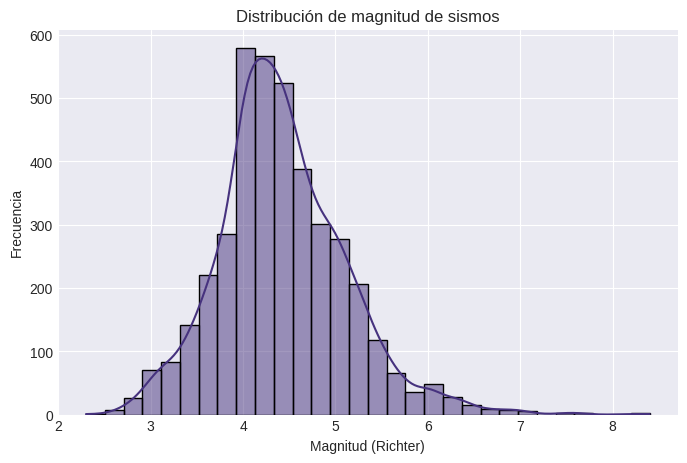

In [12]:
# 1️⃣ Distribución de magnitudes
plt.figure(figsize=(8,5))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title("Distribución de magnitud de sismos")
plt.xlabel("Magnitud (Richter)")
plt.ylabel("Frecuencia")
plt.show()

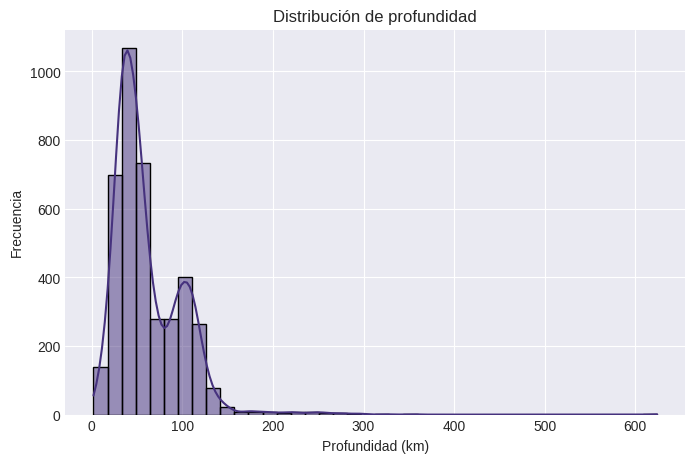

In [13]:
# 2️⃣ Distribución de profundidades
plt.figure(figsize=(8,5))
sns.histplot(df['depth'], bins=40, kde=True)
plt.title("Distribución de profundidad")
plt.xlabel("Profundidad (km)")
plt.ylabel("Frecuencia")
plt.show()

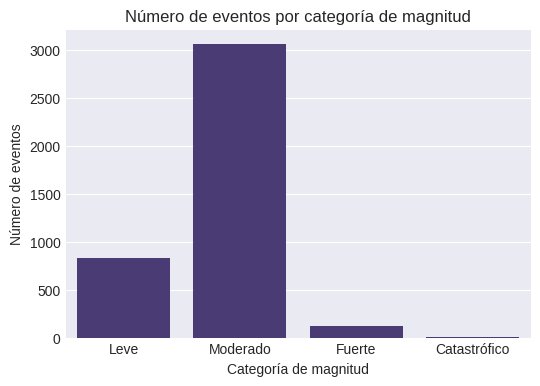

In [14]:
# 3️⃣ Conteo por categoría de magnitud
if 'mag_category' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='mag_category', order=['Leve','Moderado','Fuerte','Catastrófico'])
    plt.title("Número de eventos por categoría de magnitud")
    plt.xlabel("Categoría de magnitud")
    plt.ylabel("Número de eventos")
    plt.show()

In [16]:
# 4️⃣ Evolución temporal
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='year', color='steelblue')
    plt.title("Frecuencia anual de sismos registrados")
    plt.xlabel("Año")
    plt.ylabel("Cantidad de sismos")
    plt.xticks(rotation=45)
    plt.show()

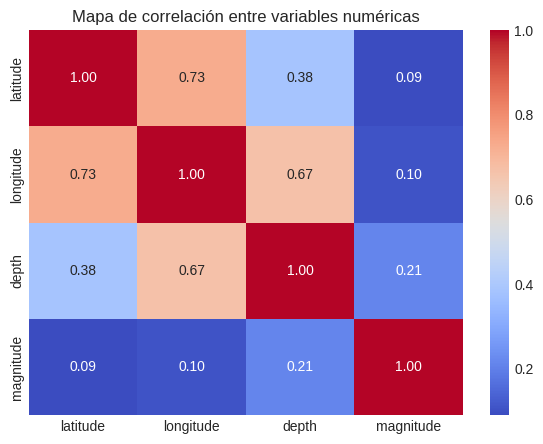

In [17]:
# 5️⃣ Correlación entre variables numéricas
plt.figure(figsize=(7,5))
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

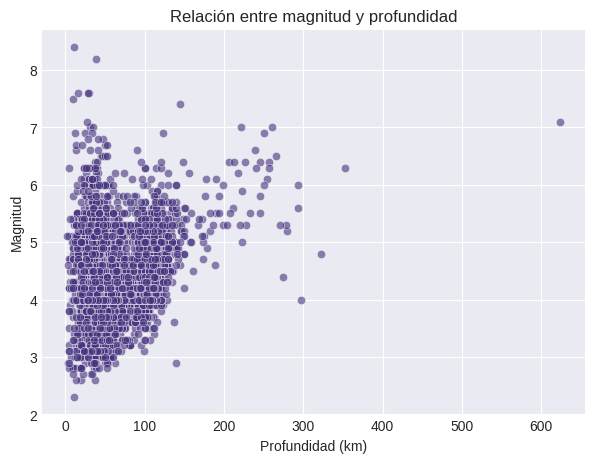

In [18]:
# 6️⃣ Scatter Magnitud vs Profundidad
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='depth', y='magnitude', alpha=0.6)
plt.title("Relación entre magnitud y profundidad")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.show()

🗺️ 03 — Folium + Plotly Visual Analytics

In [19]:
import folium

# Definir punto central de Chile
center_lat, center_lon = -30.0, -70.0

# Crear mapa base
m = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles='CartoDB positron')

# Agregar marcadores de sismos
for _, row in df.iterrows():
    color = 'red' if row['magnitude'] >= 6 else 'blue'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] / 1.5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"M{row['magnitude']} | {row['depth']} km"
    ).add_to(m)

# Mostrar mapa en Colab
m.save("chile_earthquake_map.html")
m

📊 Visualización dinámica con Plotly

In [20]:
import plotly.express as px

fig1 = px.scatter_3d(
    df,
    x="longitude",
    y="latitude",
    z="depth",
    color="magnitude",
    size="magnitude",
    hover_name="date(utc)",  # 👈 ajustado al nombre real
    title="Sismos en Chile: Distribución geográfica (3D)",
    color_continuous_scale="inferno",
    height=600
)
fig1.show()

df.columns = df.columns.str.replace(r"\(.*\)", "", regex=True).str.strip().str.lower()

In [21]:
import plotly.express as px

# Crear columna de año
df['year'] = pd.to_datetime(df['date']).dt.year

# Agrupar magnitud promedio anual
yearly = df.groupby('year')['magnitude'].mean().reset_index()

# Gráfico interactivo
fig2 = px.line(
    yearly,
    x='year',
    y='magnitude',
    markers=True,
    title="Magnitud promedio anual de sismos en Chile (2012–2024)",
    labels={'year': 'Año', 'magnitude': 'Magnitud promedio'}
)
fig2.update_traces(line_color='orange', line_width=3)
fig2.show()

🧠 04 Predictive Model

1️⃣ Preparación del dataset

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Copia del dataset base
data = df.copy()

# Crear variable objetivo (1 = sismo fuerte, 0 = sismo leve)
data['high_magnitude'] = (data['magnitude'] >= 6.0).astype(int)

# Variables predictoras simples
features = ['latitude', 'longitude', 'depth']
X = data[features]
y = data['high_magnitude']

# División entrenamiento / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2️⃣ Entrenamiento del modelo

In [23]:
# Entrenar un Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

3️⃣ Evaluación de desempeño

=== Clasificación ===
              precision    recall  f1-score   support

           0      0.973     0.996     0.984       974
           1      0.429     0.100     0.162        30

    accuracy                          0.969      1004
   macro avg      0.701     0.548     0.573      1004
weighted avg      0.957     0.969     0.960      1004

=== Matriz de confusión ===
[[970   4]
 [ 27   3]]
=== ROC-AUC ===
AUC: 0.6568617385352498


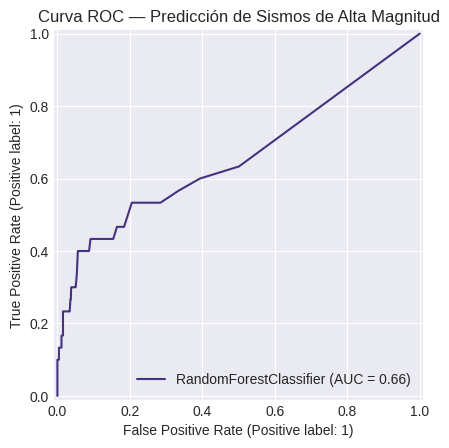

In [24]:
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=3))

print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

print("=== ROC-AUC ===")
print("AUC:", roc_auc_score(y_test, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("Curva ROC — Predicción de Sismos de Alta Magnitud")
plt.show()

4️⃣ Importancia de variables

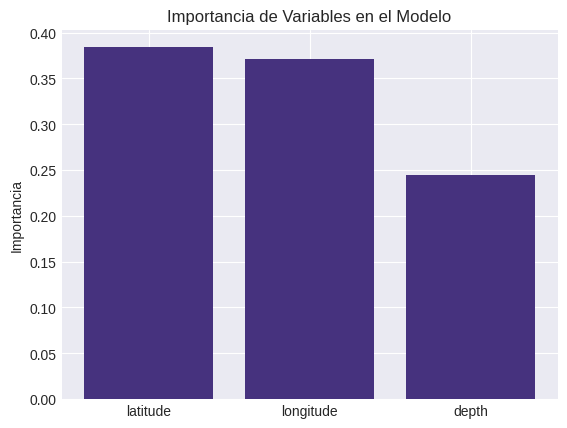

In [25]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.bar(importances.index, importances.values)
plt.title("Importancia de Variables en el Modelo")
plt.ylabel("Importancia")
plt.show()